<a href="https://colab.research.google.com/github/s1250103/Public_mori-lab/blob/eras/eras/tune/programs/prototypeModelMaker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2021/01/08：
全結合層のみのモデル

#共通設定

In [1]:
%tensorflow_version 2.x

##import

In [17]:
# file dealing
import os
import shutil
from google.colab import drive
# data dealing
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
# process deasing
import gc

# machine learning (back)
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models, initializers, callbacks
from tensorflow.keras.layers import SimpleRNN

# machine learning
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical


seed = 20201218
np.random.seed(seed)
tf.random.set_seed(seed)

##スクラッチ

In [5]:
#@title デフォルトのタイトル テキスト
keras.backend.clear_session()
gc.collect()

0

## データフォーマットを規定

In [3]:
class video_format:
  name = "video_format"
  # サンプリングされたCMデータの仕様
  playtime = "15秒"
  displaysize = "(any, any, RGB)"
  videoformat = "any"
  # モデルが扱うCMデータ(上のようなデータは、下のように変換される)
  HEIGHT = 45
  WIDTH = 80
  FRAME_SIZE = 30
  COLORinfo = 3 # "RGB"
  FPS = "2 (FRAME_SIZE / playtime)" # 定義ではなく上から導かれた値

format1 = video_format()

#モデル作成

In [15]:
# モデル作成
model = models.Sequential()
# 入力層
model.add(
     layers.Reshape(
        (format1.FRAME_SIZE,
         format1.HEIGHT,
         format1.WIDTH,
         format1.COLORinfo),
        input_shape=(format1.FRAME_SIZE * format1.HEIGHT * format1.WIDTH * format1.COLORinfo,),
        name='ENTRANCE' )
)
# 中間層

## 畳み込み_0
h = 2 
w = 3 
d = 3 
model.add(
    layers.Conv3D(
        filters=64,
        kernel_size=(h, w, d),
        strides=(h, w, d),
        padding='same',
        activation='relu',
        name='conv_0'))
## pool_0
model.add(
    layers.MaxPooling3D(pool_size=(1, 1, 3), name='pool_0'))


## 全結合0
model.add(
    layers.Flatten(name='pipe'),
)
# model.add(
#     layers.Dense(64,
#       activation='relu',
#       name='Check1' ),
# )
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
    

## product
model.add(
    layers.Dense(2, activation='softmax', name='product')
)

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# 出力層
model.add(
    layers.Dense(4, activation='softmax', name='WATERSUPPLY')
)

# 最適化
adam = keras.optimizers.Adam(
    lr=1e-7, beta_1=0.9, beta_2=0.999,
    epsilon=None, decay=0.0, amsgrad=False)
# 誤差関数
mse = tf.keras.losses.MeanSquaredError()
cce = tf.keras.losses.CategoricalCrossentropy()

model.compile(
    optimizer=adam,
    loss=cce,
    metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ENTRANCE (Reshape)           (None, 30, 45, 80, 3)     0         
_________________________________________________________________
conv_0 (Conv3D)              (None, 15, 15, 27, 64)    3520      
_________________________________________________________________
pool_0 (MaxPooling3D)        (None, 15, 15, 9, 64)     0         
_________________________________________________________________
pipe (Flatten)               (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                8294464   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4

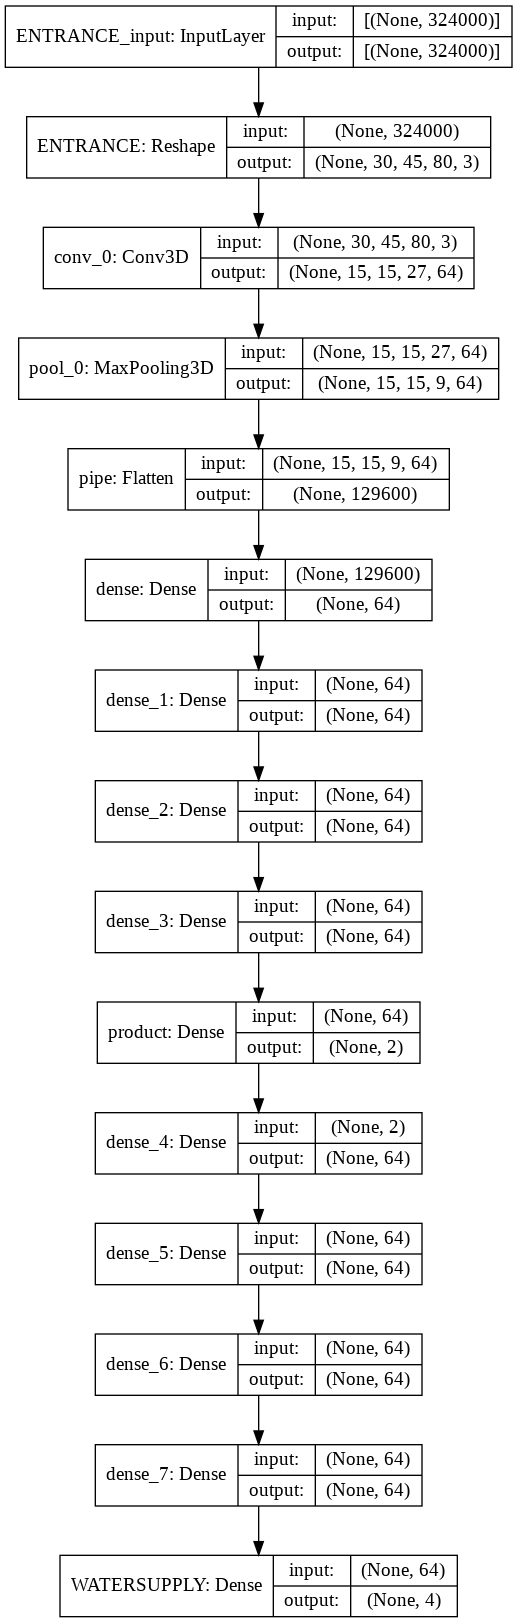

In [16]:
model.summary()
plot_model(
  model,
  show_shapes=True,
  )